### Analise de sentimento sobre filmes

O conjunto de dados utilizados vai ser o [IMDB-DATASET](https://www.kaggle.com/luisfredgs/imdb-ptbr) disponível no Kaggle.

Vamos criar um modelo de classificação de negativa e  positiva a implementação de alguns modelos supervisionado em Python para classificação. Mas antes disso vamos realizar algumas atividades, tais como EDA (Exploração de Dados) e o processo de pré-processamento dos dados. Vai ser criado um modelo de classificação binária onde só temos dois rótulos 0 = Negativo e 1 = Positivo.

In [ ]:
from sklearn.utils import shuffle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

#### Lendo conjunto de dados

In [2]:
dataset = pd.read_csv('imdb-reviews-pt-br.csv')

#### Pegando 1500 amostras do conjunto de dados original de forma balanceada

In [3]:
# pegando apenas os textos que possuem sentimento negativo
df_negative_sentiment = dataset.loc[dataset['sentiment'] == 'neg']
# pegando apenas os textos que possuem sentimento positivo
df_positive_sentiment = dataset.loc[dataset['sentiment'] == 'pos']

# # criando um conjunto de dados novo com apenas 1500 amostras, tendo um balanceamento de 750 amostras positivas e 750 amostras negativas
df = pd.concat([df_negative_sentiment[0:1500], df_positive_sentiment[0:1500]])
# embaralha o novo conjunto de dados
df = shuffle(df)

In [4]:
df.drop(['id', 'text_en'], axis=1, inplace=True)

In [5]:
df.reset_index(inplace=True)
df.drop('index', axis=1, inplace=True)
df.head()

,text_pt,sentiment
0,"Qualquer um dos Law & Orders, CSI, escolha a c...",neg
1,Eu só assisti esse curta no PlanetOut Movies. ...,pos
2,Acho que Andrew Davies fez um trabalho admiráv...,pos
3,"Michael Polishs hipnótico ""Northfork"" é um fil...",pos
4,Os filmes sobre o U.F.O.s são sempre uma boa m...,neg


In [6]:
df.shape

(3000, 2)

### Aplicando One-Hot-Enconding
- Vai transforma variaveis categoricas em variaveis discretas.

In [7]:
sentiment = pd.get_dummies(df['sentiment'], prefix='sentiment', drop_first=True)
df['sentiment'] = sentiment
df.head()

,text_pt,sentiment
0,"Qualquer um dos Law & Orders, CSI, escolha a c...",0
1,Eu só assisti esse curta no PlanetOut Movies. ...,1
2,Acho que Andrew Davies fez um trabalho admiráv...,1
3,"Michael Polishs hipnótico ""Northfork"" é um fil...",1
4,Os filmes sobre o U.F.O.s são sempre uma boa m...,0


In [8]:
df["text_pt"].iloc[2]

'Acho que Andrew Davies fez um trabalho admirável ao pegar um livro magnífico que imitava o ritmo e o estilo de um romance vitoriano, transformando-o em um filme comovente e divertido. Estou contente por ter lido o livro duas vezes, o que geralmente é o caso para mim. Eu sei que é preciso ver um romance e um filme como mídia diferente e julgá-los de acordo. Mas, ainda assim, é difícil ler o material original depois que um filme mostra as melhores partes. Percebo que Davies é um ótimo adaptador, mas gostaria que os produtores tivessem escolhido uma mulher para escrever o roteiro. Davies, como ele admite no comentário que acompanha o filme em DVD, queria particularmente enfatizar os bits mais escatológicos do livro. Eu certamente gostei disso, no filme, como no livro. Mas Davies perdeu meia dúzia de momentos dolorosos e dolorosamente dolorosos que ele poderia ter incorporado se sua sensibilidade fosse mais feminina. Eu também discordaria de seu uso do símbolo primário dos livros, a rosa.

In [10]:
### Aplicando preprocessamento no texto para remover sujeiras de dentro do conjunto de dados

In [11]:
# Importando bibliotecas de pre processamento
from nltk.corpus import stopwords

import unicodedata
import re

from typing import List

In [12]:
def clean_words(words):
    word = re.sub('([\.\, \\/ \\" \\^\\\'\_\´\`\’\@\#\$\%\?\!\:\;\*-\=\+\{\}]+)', '', words)
    word = re.sub('/\.', '', word)
    word = re.sub('(etc|[0-9]{1,4}|decada|seculo|a{2,200}|a{2,200}h{2,200}|a{2,200}rgh|-{1,200})+', '', word)
    return word

def clean_sentences(text: List[str]) -> List[str]:
    alpha = [' ','a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z']
    remove_stopwords = stopwords.words('portuguese')

    text = re.sub('[!"#$%&()*\+,-./:;<=>?@[\\]^_`{|}~\t\n]', '', text)
    text = unicodedata.normalize('NFD', text).encode('ascii', 'ignore').decode('utf-8')
    text = text.lower()  # change to lower case
    text = ''.join([char for char in text if char in alpha])
    text = ' '.join([clean_words(word) for word in text.split(' ') if
                     ((word not in remove_stopwords) & (len(word) > 1))])

    return text

In [13]:
df["clean_text_pt"] = df["text_pt"].apply(clean_sentences)

In [14]:
### Texto original vs Texto Pre-processado

In [15]:
print("Texto original\n\n", df['text_pt'].iloc[0], "\n\nQtd de palavras = ", len(df['text_pt'].iloc[0]))

Texto original

 Qualquer um dos Law & Orders, CSI, escolha a cidade, e Homicide: Life on the Streets episódios mais fracos é superior ao episódio mais forte de Bones.David Boreanaz está preso no modesto Angel, e Emily Deschanel interpreta "Bones" também .. irrealisticamente. Os atores como um todo têm cenas terríveis juntos, seja com atuação forçada, ou apenas linhas terríveis. Os assassinatos se tornam previsíveis depois de um tempo, já que a prefiguração e as pistas são muito óbvias. A música é boa, embora realmente desnecessária às vezes. no total, Bones dificilmente é o programa que eu recomendaria assistir durante os dias da semana, pois é uma cópia carbono de shows melhores com personagens irreais e histórias cada vez mais entediantes. Pegue isso se puder. 

Qtd de palavras =  756


In [16]:
print("Texto pre-processado\n\n", df['clean_text_pt'].iloc[0], "\n\nQtd de palavras = ", len(df['clean_text_pt'].iloc[0]))

Texto pre-processado

 qualquer law orders csi escolha cidade homicide life on the streets episodios fracos superior episodio forte bonesdavid boreanaz preso modesto angel emily deschanel interpreta bones tambem irrealisticamente atores todo cenas terriveis juntos atuacao forcada apenas linhas terriveis assassinatos tornam previsiveis tempo ja prefiguracao pistas sao obvias musica boa embora realmente desnecessaria vezes total bones dificilmente programa recomendaria assistir durante dias semana pois copia carbono shows melhores personagens irreais historias cada vez entediantes pegue puder 

Qtd de palavras =  574


In [17]:
### Criando uma analise pelo tamanho do texto original vs o tamanho do texto pre-processado

In [18]:
df['length'] = df.text_pt.str.len()
df['clean_length'] = df.clean_text_pt.str.len()
df.head()

,text_pt,sentiment,clean_text_pt,length,clean_length
0,"Qualquer um dos Law & Orders, CSI, escolha a c...",0,qualquer law orders csi escolha cidade homicid...,756,574
1,Eu só assisti esse curta no PlanetOut Movies. ...,1,so assisti curta planetout movies starcrossed ...,529,395
2,Acho que Andrew Davies fez um trabalho admiráv...,1,acho andrew davies fez trabalho admiravel pega...,1736,1238
3,"Michael Polishs hipnótico ""Northfork"" é um fil...",1,michael polishs hipnotico northfork filme vai ...,3264,2433
4,Os filmes sobre o U.F.O.s são sempre uma boa m...,0,filmes sobre ufos sao sempre boa maneira matar...,2147,1557


In [19]:
# Remoção de comprimento total
print ("Comprimento original:", df.length.sum ())
print ("Comprimento limpo:", df.clean_length.sum ())
print ("Total de palavras removidas:", (df.length.sum ()) - (df.clean_length.sum ()))

Comprimento original: 3772674
Comprimento limpo: 2720330
Total de palavras removidas: 1052344


In [20]:
# Porcentagem da quantidade de dados indesejados limpo ou processado após a remoção do comprimento.
print("Porcentagem de dados removidos = ", (1052344 / 3772674) * 100 )

Porcentagem de dados removidos =  27.89384929628163


In [21]:
#### Aplicando EDA para entender o comportamento dos dados

<AxesSubplot:xlabel='sentiment', ylabel='count'>

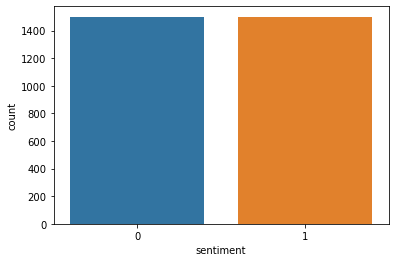

In [22]:
sns.countplot(x=df.sentiment)

In [23]:
df_negative = df.loc[df['sentiment'] == 0]
df_positive = df.loc[df['sentiment'] == 1]

Text(0.5, 1.0, 'Avaliacao Positiva')

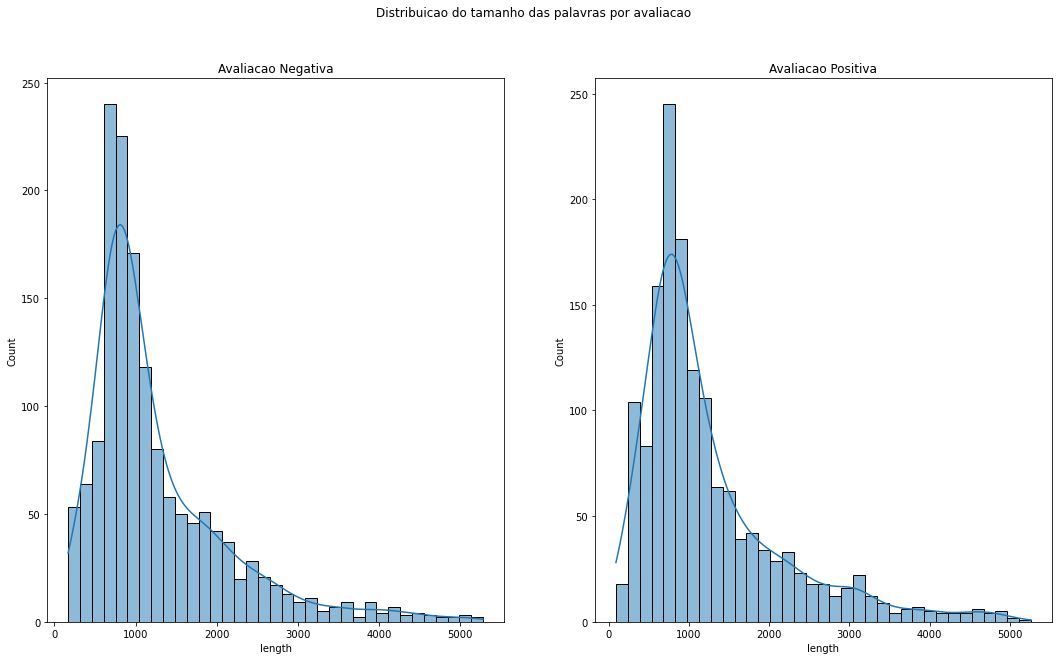

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribuicao do tamanho das palavras por avaliacao')

# Avaliacao negativa
sns.histplot(ax=axes[0], x=df_negative.length, kde=True, linewidth=1)
axes[0].set_title("Avaliacao Negativa")

# Avaliacao Positiva
sns.histplot(ax=axes[1], x=df_positive.length, kde=True, linewidth=1)
axes[1].set_title("Avaliacao Positiva")

Text(0.5, 1.0, 'Avaliacao Positiva')

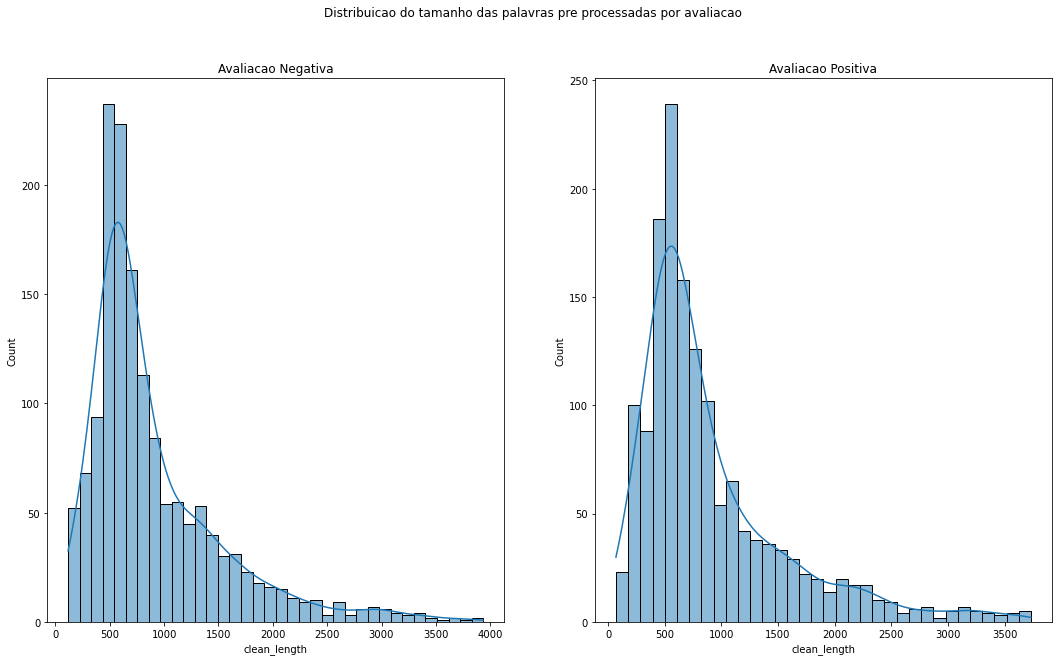

In [25]:
fig, axes = plt.subplots(1, 2, figsize=(18, 10))
fig.suptitle('Distribuicao do tamanho das palavras pre processadas por avaliacao')

# Avaliacao negativa
sns.histplot(ax=axes[0], x=df_negative.clean_length, kde=True, linewidth=1)
axes[0].set_title("Avaliacao Negativa")

# Avaliacao Positiva
sns.histplot(ax=axes[1], x=df_positive.clean_length, kde=True, linewidth=1)
axes[1].set_title("Avaliacao Positiva")

In [27]:
### Criando uma wordcloud
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

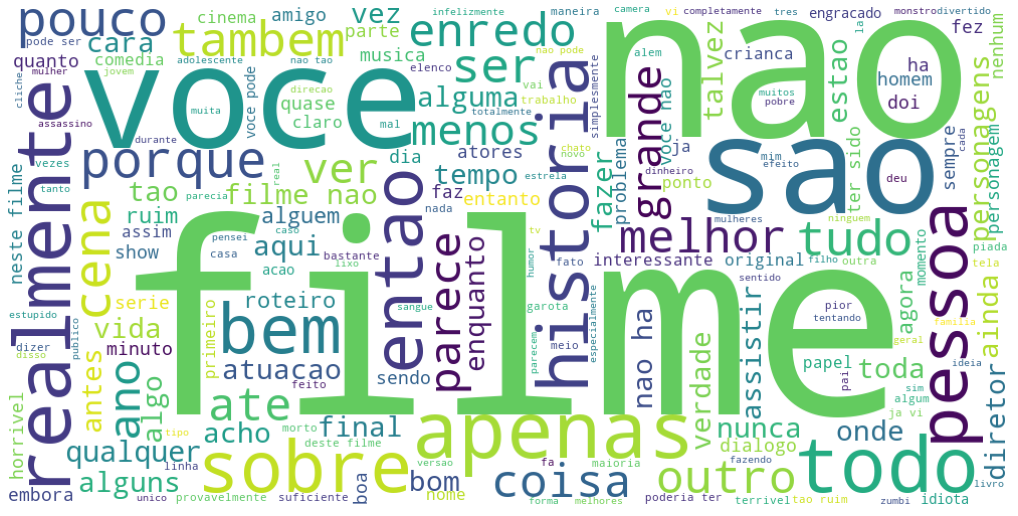

In [44]:
fig = plt.figure(figsize=(18, 10))
word_cloud = ""
for row in df_negative["clean_text_pt"]:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white', min_font_size = 10).generate(word_cloud)
plt.axis("off")
plt.imshow(wordcloud)

A nuvem de palavras exibida acima é boa, mas algumas das palavras são maiores do que as outras. Isso ocorre porque o tamanho da palavra na nuvem de palavras é proporcional à frequência da palavra dentro do corpus.

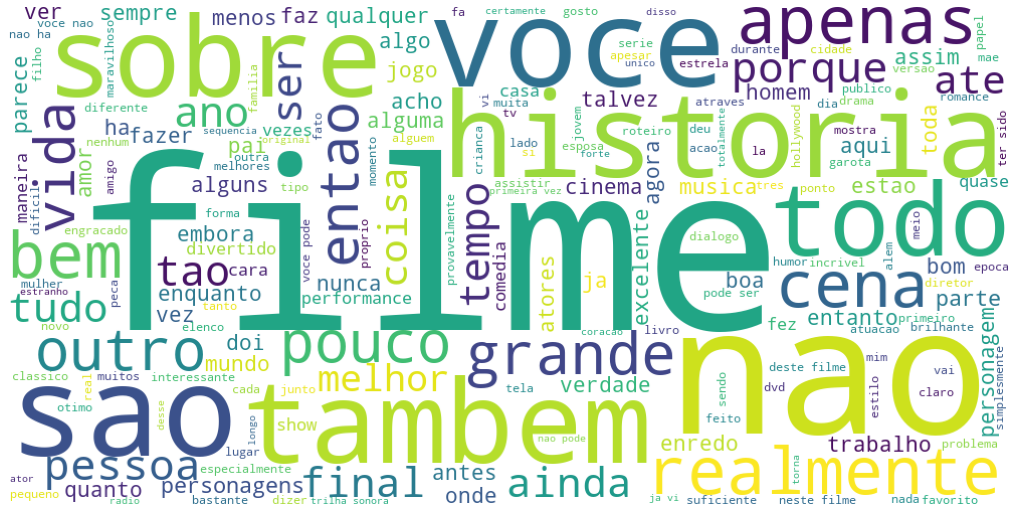

In [45]:
fig = plt.figure(figsize=(18, 10))
word_cloud = ""
for row in df_positive["clean_text_pt"]:
    for word in row:
        word_cloud+=" ".join(word)
wordcloud = WordCloud(width = 1000, height = 500,background_color ='white', min_font_size = 10).generate(word_cloud)
plt.axis("off")
plt.imshow(wordcloud)

### Divisão do conjunto de dados em 70/30 Test-Train
- train = 70% dos dados
- test = 30% dos dados

In [31]:
from sklearn.model_selection import train_test_split
X = df["clean_text_pt"]
Y = df['sentiment']

X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.3, random_state=100)

### Aplicando a representacao TF-IDF
- Representando as palavras dentro do espaco vetorial

In [60]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

In [61]:
tfidf_vectorizer = TfidfVectorizer(use_idf=True)
X_train_vectors_tfidf = tfidf_vectorizer.fit_transform(X_train).toarray()

In [62]:
print("n_samples: %d, n_features: %d" % X_train_vectors_tfidf.shape)

n_samples: 2100, n_features: 30169


In [63]:
X_test_vectors_tfidf = tfidf_vectorizer.transform(X_test).toarray()

In [64]:
print("n_samples: %d, n_features: %d" % X_test_vectors_tfidf.shape)

n_samples: 900, n_features: 30169


In [65]:
print(X_train_vectors_tfidf.shape)

(2100, 30169)


In [66]:
print(y_train.shape)

(2100,)


### Contruindo o modelo de Naive Bayes
- Utilizando os dados de traino e teste representados na forma de vetores

In [67]:
from sklearn.naive_bayes import GaussianNB

In [69]:
naive_bayes_classifier = GaussianNB()
naive_bayes_classifier.fit(X_train_vectors_tfidf, y_train)

GaussianNB()

In [70]:
y_pred = naive_bayes_classifier.predict(X_test_vectors_tfidf)

### Avaliação dos modelos

Um resumo sobre as métricas avaliativas

- accuracy ou acuracia esta função calcula a precisão do subconjunto: o conjunto de rótulos previsto para uma amostra deve corresponder exatamente ao conjunto correspondente de rótulos em y_true.

- A precision ou precisão é a proporção em que está o número de verdadeiros positivos e o número de falsos positivos. A precisão é intuitivamente a capacidade do classificador de não rotular como positiva uma amostra negativa. O melhor valor é 1 e o pior valor é 0.

- O recall ou cobertura é a proporção em que está o número de verdadeiros positivos e o número de falsos negativos. O recall é intuitivamente a capacidade do classificador de encontrar todas as amostras positivas. O melhor valor é 1 e o pior valor é 0.

- A pontuação F1 pode ser interpretada como uma média ponderada da precisão e recuperação, onde uma pontuação F1 atinge seu melhor valor em 1 e a pior pontuação em 0.

In [71]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [74]:
print(classification_report(y_test, y_pred, target_names=['Positive', 'Negative']))

              precision    recall  f1-score   support

    Positive       0.83      0.82      0.83       437
    Negative       0.83      0.84      0.84       463

    accuracy                           0.83       900
   macro avg       0.83      0.83      0.83       900
weighted avg       0.83      0.83      0.83       900



In [75]:
print("Confusion matrix:")
print(confusion_matrix(y_test, y_pred))

Confusion matrix:
[[360  77]
 [ 74 389]]


In [76]:
"""
Fazendo analise de um comentario do filme Harry Potter, dessa forma iremos ver o que o algoritmo treinado ira nos retorna
"""

'\nFazendo analise de um comentario do filme Harry Potter, dessa forma iremos ver o que o algoritmo treinado ira nos retorna\n'

In [110]:
text = """
Algum estranho esquisito que tinha três famílias, traiu e negligenciou todos eles, construiu edifícios inúteis feios por toda parte que agora são desvalorizados e desmoronando. Seu filho bastardo, meio judeu, anda por aí entrevistando aleatoriamente pessoas senis que não nos interessam e mostra suas terríveis habilidades de narrar e escrever enquanto trágicas músicas de piano tocam. Isso se prolonga por quase duas horas chatas e não dá em nada. Todas as pessoas hippies superficiais que assistem a esses documentários estúpidos, comendo saladas e iogurtes, acham que toda essa porcaria é tão importante. Não é. Salve as baleias. Ninguém se importa.
"""
text

'\nAlgum estranho esquisito que tinha três famílias, traiu e negligenciou todos eles, construiu edifícios inúteis feios por toda parte que agora são desvalorizados e desmoronando. Seu filho bastardo, meio judeu, anda por aí entrevistando aleatoriamente pessoas senis que não nos interessam e mostra suas terríveis habilidades de narrar e escrever enquanto trágicas músicas de piano tocam. Isso se prolonga por quase duas horas chatas e não dá em nada. Todas as pessoas hippies superficiais que assistem a esses documentários estúpidos, comendo saladas e iogurtes, acham que toda essa porcaria é tão importante. Não é. Salve as baleias. Ninguém se importa.\n'

- Observacao, para cada entrada de dados nova a ser analisada pelo algoritmo ela deve passar pelos seguintes passos
    - Pre-processamento
    - Representacao vetorial do texto

In [111]:
text_processed = clean_sentences(text)
text_processed

'algum estranho esquisito tres familias traiu negligenciou todos construiu edificios inuteis feios toda parte agora sao desvalorizados desmoronando filho bastardo meio judeu anda ai entrevistando aleatoriamente pessoas senis nao interessam mostra terriveis habilidades narrar escrever enquanto tragicas musicas piano tocam prolonga quase duas horas chatas nao nada todas pessoas hippies superficiais assistem documentarios estupidos comendo saladas iogurtes acham toda porcaria tao importante nao salve baleias ninguem importa'

In [112]:
test_input = tf_idf.transform([text_processed]).toarray()
test_input.shape

(1, 30169)

In [113]:
#0= avaliacao negativa
#1= avaliacao positiva
result = naive_bayes_classifier.predict(test_input)[0]
if result==1:
    print("Avaliacao Positiva")
elif result==0:
    print("Avaliacao Negativa")

Avaliacao Negativa
